## Breast Cancer Prediction

#### I will be using the Breast Cancer Wisconsin dataset to classify whether a tumor is malignant or benign using given patient data. The KNN algorithm will be used.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap

In [21]:
# Importing dataset and creating a dataframe.
df = pd.read_csv('BreastCancerWisconsinDataset.csv')
display(df.head()) #Displays first few rows of dataset
display(df.dtypes) #Displays data type of each column in the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [23]:
#Dropping 'id' column as it is not needed for prediction
df = df.drop(columns=['id'])   

In [25]:
#Mapping to numerical values
# (M = Malignant -> 1, B = Benign -> 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [27]:
# Checking for missing values
print(df.isnull().sum()) 

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [29]:
# Dropping the Unnamed: 32 column as it has no data
df = df.drop(columns=['Unnamed: 32'])

In [33]:
# Features (independent variables) 
X = df.iloc[:, 1:].values  # All columns except 'diagnosis' (index 0)
#Target (dependent variable)
y = df.iloc[:, 0].values   # 'diagnosis' column as the target
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 

In [35]:
# Splitting the data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    #70% training, 30% testing

In [45]:
# Feature Scaling 
# Reason: Feature Scaling ensures all features contribute equally to distance calculations in KNN. 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.74998027 -1.09978744 -0.74158608 ... -0.6235968   0.07754241
   0.45062841]
 [-1.02821446 -0.1392617  -1.02980434 ... -0.7612376  -1.07145262
  -0.29541379]
 [-0.53852228 -0.29934933 -0.56857428 ... -0.50470441  0.34900827
  -0.13371556]
 ...
 [-1.3214733  -0.20855336 -1.3143845  ... -0.98621857 -0.69108476
  -0.13148524]
 [-1.24245479 -0.23244704 -1.27759928 ... -1.7562754  -1.55125275
  -1.01078909]
 [-0.74441558  1.13188181 -0.72016173 ... -0.28490593 -1.2308599
   0.20083251]]
[[-0.21855296  0.31710749 -0.14938447 ...  1.36998461  1.0939611
   1.51560644]
 [-0.27141746  1.44727832 -0.33290634 ... -0.84095647 -0.70686766
  -0.88310324]
 [-0.04604776 -0.84412512 -0.11098232 ... -0.50394228 -1.19298094
  -0.92659449]
 ...
 [-0.13230036 -0.12253613 -0.14574637 ...  0.20087616 -0.06766026
   0.36754897]
 [-0.24637638  0.56799108 -0.28682376 ... -0.90055508 -0.40225771
  -0.95558866]
 [-1.35013142  0.65639767 -1.34712739 ... -1.36545479 -0.72107227
  -0.54576727]]


In [47]:
#Training KNN Model
# Initializing KNN classifier with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [49]:
# Predicting the test results
y_pred = knn_classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [51]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[107   1]
 [  6  57]]


In [76]:
# Accuracy, precision, recall, f1-score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))  
#classification_report: a text report that generates the main classification metrics

Accuracy:  0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



#### KNN was trained on 30 features, but it is not possible to visualize all 30 features, so for simplicity, we will only visualize 2.

#### We will subset the data to two features before training the classifier, so that the model is trained and visualized using the same number of features.

In [65]:
# Select two features for visualization 
# Selecting 'radius_mean' and 'texture_mean'
X_train_vis = X_train[:, :2]  
X_test_vis = X_test[:, :2]  

In [67]:
# Training the KNN classifier using only the two features
knn_classifier_vis = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier_vis.fit(X_train_vis, y_train)

KNeighborsClassifier()

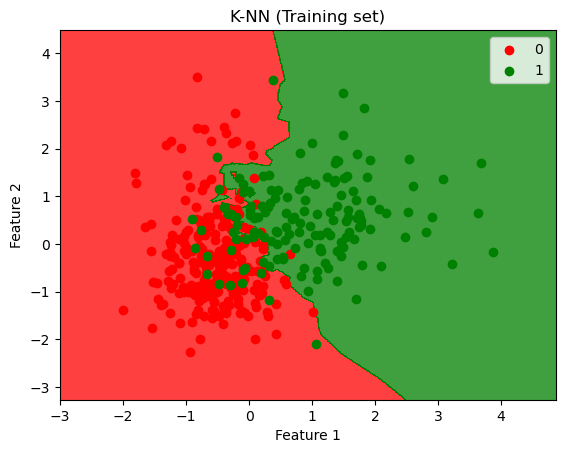

In [69]:
# Visualizing the training set result (using the two selected features)
X_set, y_set = X_train_vis, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, knn_classifier_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)
plt.title('K-NN (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

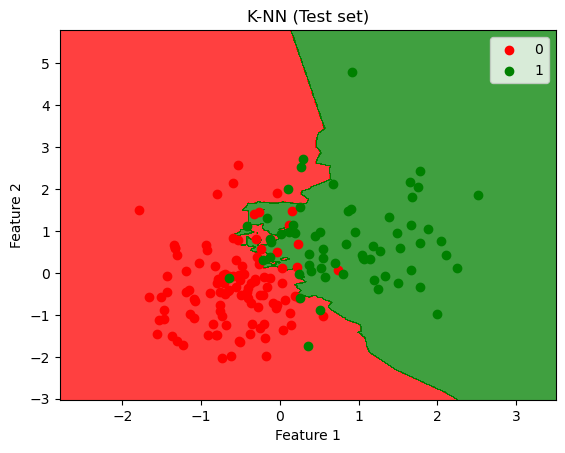

In [71]:
# Visualizing the test set result (using the two selected features)
X_set_test, y_set_test = X_test_vis, y_test  
X1_test, X2_test = np.meshgrid(np.arange(start=X_set_test[:, 0].min() - 1, stop=X_set_test[:, 0].max() + 1, step=0.01),
                                np.arange(start=X_set_test[:, 1].min() - 1, stop=X_set_test[:, 1].max() + 1, step=0.01))

Z_test = knn_classifier_vis.predict(np.array([X1_test.ravel(), X2_test.ravel()]).T).reshape(X1_test.shape)

plt.contourf(X1_test, X2_test, Z_test, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1_test.min(), X1_test.max())
plt.ylim(X2_test.min(), X2_test.max())

for i, j in enumerate(np.unique(y_set_test)):
    plt.scatter(X_set_test[y_set_test == j, 0], X_set_test[y_set_test == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN (Test set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Summary: This code implements a K-Nearest Neighbors (KNN) classifier to predict whether a tumor is malignant or benign using the Breast Cancer Wisconsin dataset. It includes data preprocessing, model training, and visualization of decision boundaries for both training and test sets, limited to two features for clarity. The model's accuracy is evaluated based on its performance in correctly classifying the tumor types.
